#**CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING (SUPERVISED LEARNING : K-NN ALGORITHM)**


#Importing The Required Python Libraries


In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
import time
%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#DATA PRE-PROCESSING

#Read The Data

In [3]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#Describe The Data

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(65453, 31)

#DATA CLEANING

#Cheking For Missing Values

In [7]:
df.isnull().any().sum()

20

#Observe The Different Feature Types Present In The Data

In [8]:
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [9]:
df.Time.tail(15)

,Time
65438,51583
65439,51584
65440,51584
65441,51584
65442,51585
65443,51585
65444,51586
65445,51587
65446,51588
65447,51589


#Checking the % of frauds before moving forward

In [10]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]
x = len(fraud)/All
y = len(nonFraud)/All
print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')
print(len(fraud))

frauds : 0.25820054084610333 %
non frauds : 99.74027164530274 %
169


#Create a bar plot for fraudulent vs non-fraudulent transcations

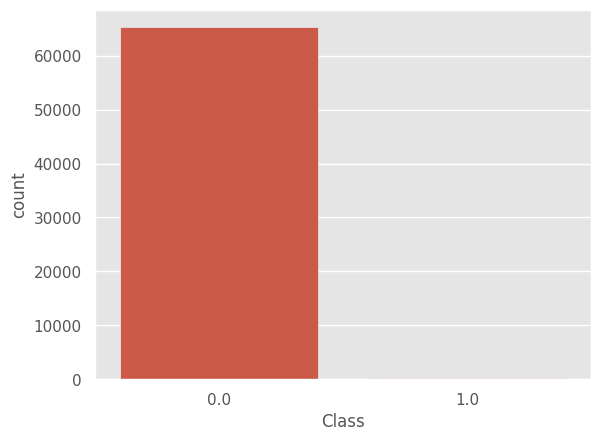

In [11]:
sns.countplot(x='Class',data=df)
plt.show()

In [12]:
df = pd.read_csv('creditcard.csv')
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


#**EXPLORATORY DATA ANALYSIS**

#Checking the distribution of amount


<Axes: xlabel='Amount', ylabel='Density'>

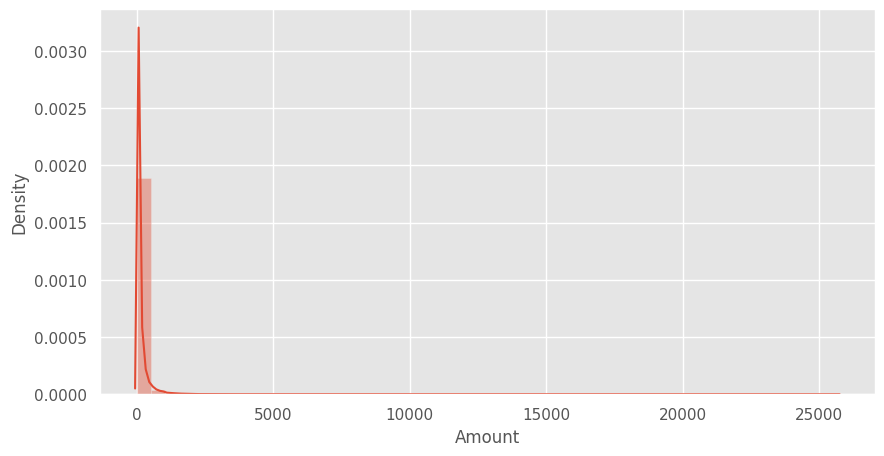

In [13]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('creditcard.csv')
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

#Checking the distribution of time

<Axes: ylabel='Density'>

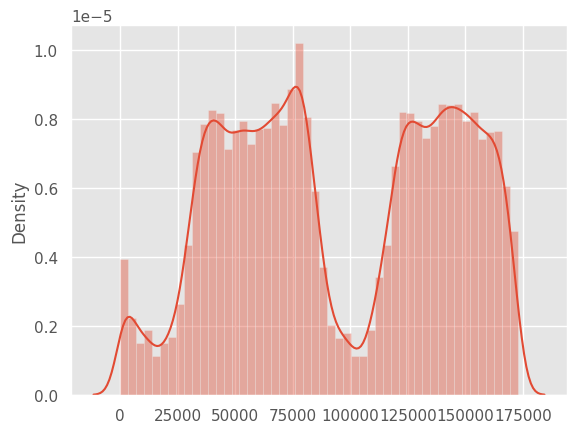

In [14]:
time = [df['Time'].values]
sns.distplot(time)

#Distribution of anomalous features

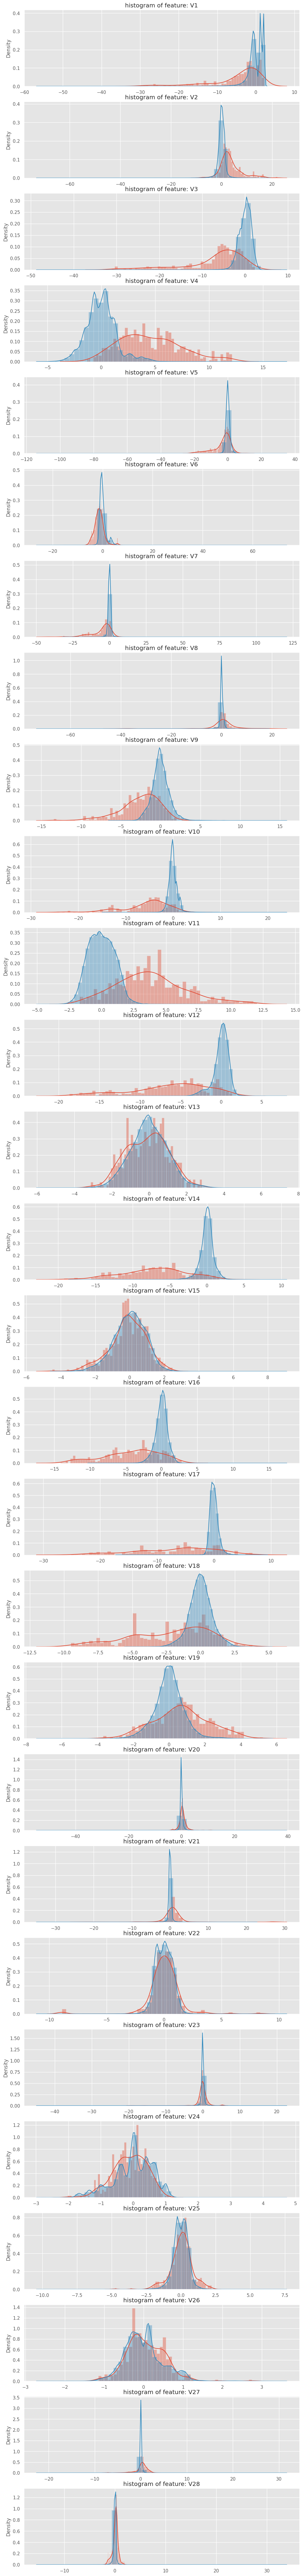

In [16]:
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

**STANDARDIZING THE DATA**

#Standardizing the features

In [17]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**DATA REDUCTION & DATA TRANSFORMATION**

#PCA Transformation

PCA (Principal Component Analysis) mainly using to reduce the size of the feature space while retaining as much of the information as possible. In here all the features transformed into 2 features using PCA.

In [18]:
df = pd.read_csv('creditcard.csv')
X = df.drop(['Class'], axis = 1)
y = df['Class']
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,-94813.862881,55.979467,0
1,-94813.854640,-90.953660,0
2,-94812.875662,285.024840,0
3,-94812.861396,29.859853,0
4,-94811.858408,-23.652028,0


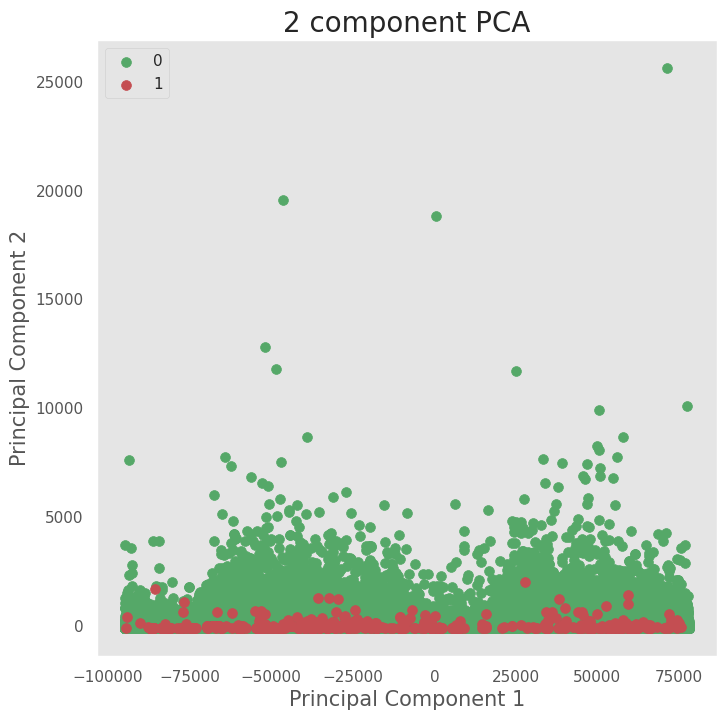

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'], finalDf.loc[indicesToKeep,'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

#Pairplot Data Grid

In [20]:
def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''
    plt.figure(figsize=(15,15))
    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


<Figure size 1500x1500 with 0 Axes>

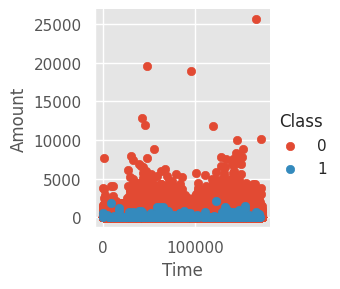

In [21]:
pairplot_data_grid(df, "Time", "Amount", "Class")

Hence, we observe that the 99.85% of transactions amount to less than 2500. Let us see how many of these are fraud and others legitimate

**SCATTER PLOT**

#Create a scatter plot to observe the distribution of classes with time

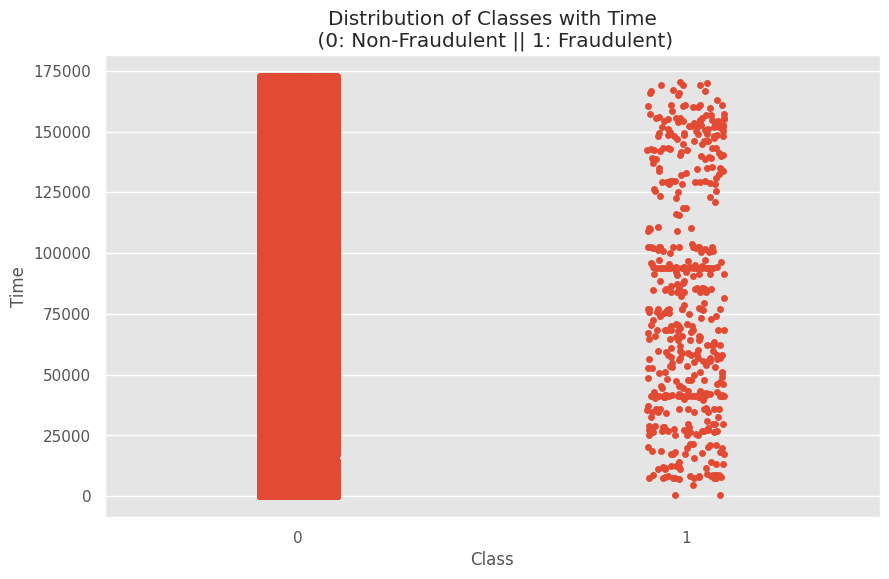

In [22]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

#Create a scatter plot to observe the distribution of classes with Amount

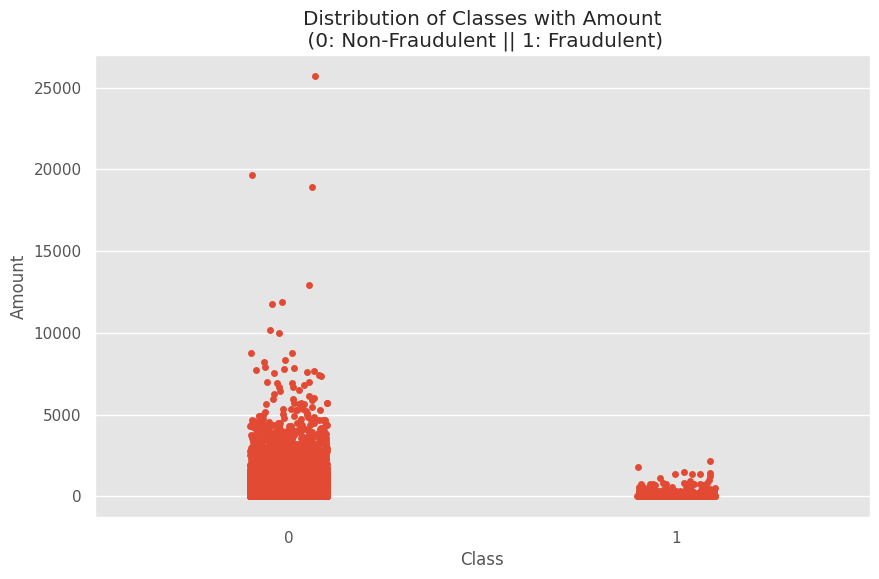

In [23]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

#Heat map with correlation of features

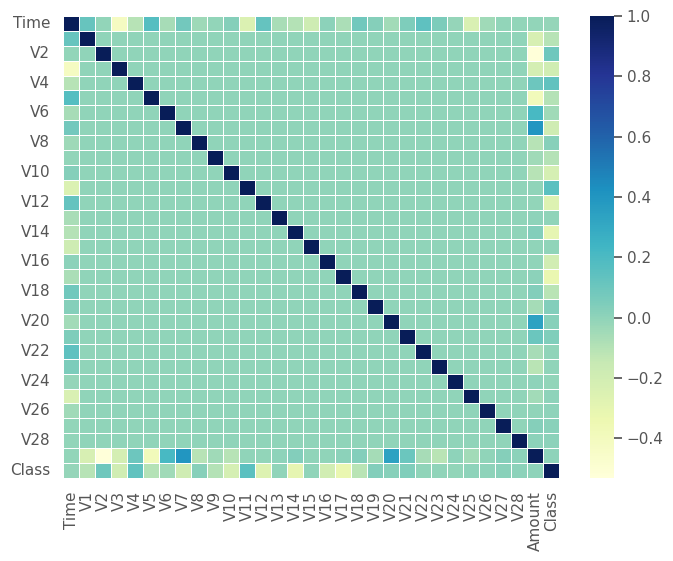

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')
plt.show()

Thus, we can conclude that since the number of fraud transaction below the amount of 2500 is same as the number of total fraud transactions. Hence, all fraud transactions are less than 2500.

In [25]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

449
284358


In [26]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

In [28]:
fraud = 0
legitimate = 1
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print("FRAUD:",fraud)
print("NON-FRAUD:",legitimate)

FRAUD: 492
NON-FRAUD: 283867


Text(0, 0.5, 'Frequency')

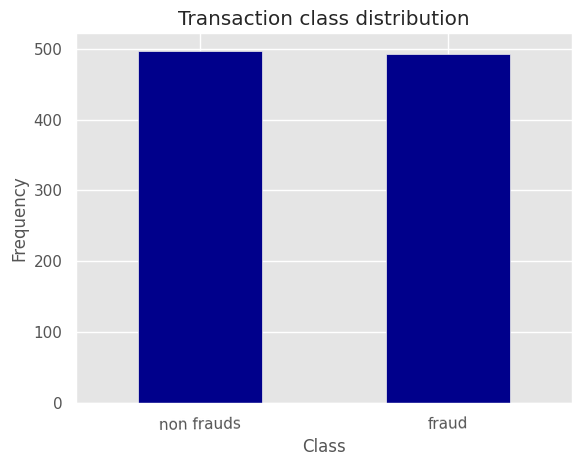

In [29]:
df = df.sample(frac=1)
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:497]
new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=45)
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=1,color = 'darkblue')
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

#**Applying Machine Learning Algorithms**

#Breaking the dataset into training and testing sets

**DATA MINING AND SPLITTING**

#KNN Classification

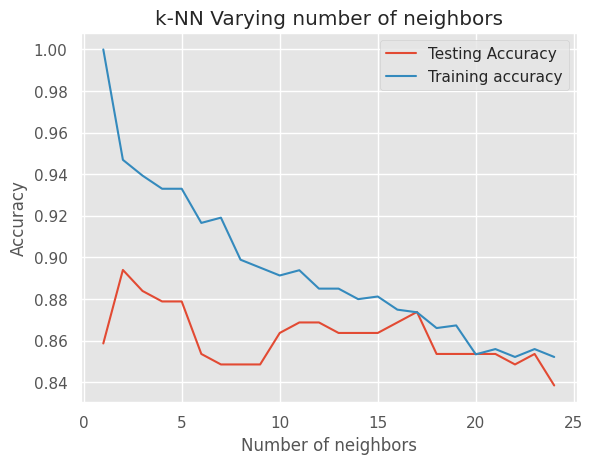

In [31]:
df = pd.read_csv('creditcard.csv')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])
feature_array = features.values
label_array = labels.values
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#Blob Representation

Text(0.5, 1.0, ' Number of Blobs')

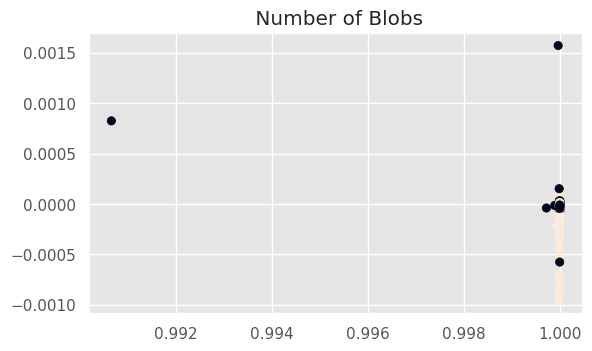

In [32]:
import numpy as np
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
knn_predicted_test_labels=knn.predict(X_test)
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

#KNN Scores

In [33]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)

In [34]:
print(knn_accuracy_score)

0.8939393939393939


In [35]:
print(knn_f1_score)

0.8695652173913043


In [36]:
print(knn_precison_score)

0.9722222222222222


In [37]:
print(knn_recall_score)

0.7865168539325843


In [38]:
print(knn_MCC)

0.7943521459975504


In [39]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8838383838383839

#Displaying the results

In [40]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.8939393939393939
Precison --> 0.9722222222222222
Recall --> 0.7865168539325843
F1 --> 0.8695652173913043
MCC --> 0.7943521459975504
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       109
           1       0.97      0.79      0.87        89

    accuracy                           0.89       198
   macro avg       0.91      0.88      0.89       198
weighted avg       0.90      0.89      0.89       198



#Confusion Matrix Representation

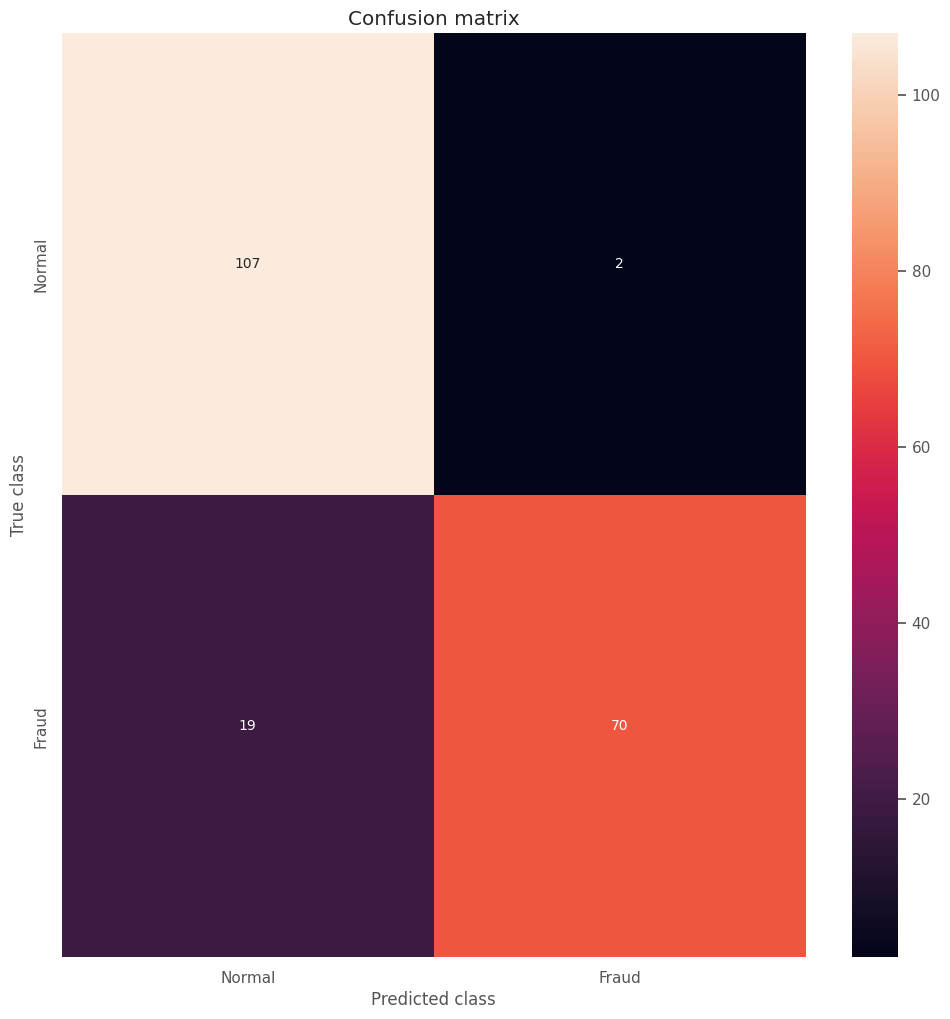

In [41]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Comparing KNN With Other Algorithms

In [43]:
#Compare Algorithms
##Spot-Checking Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.945169 (0.027658)
SVM: 0.827928 (0.096424)
CART: 0.904670 (0.040023)


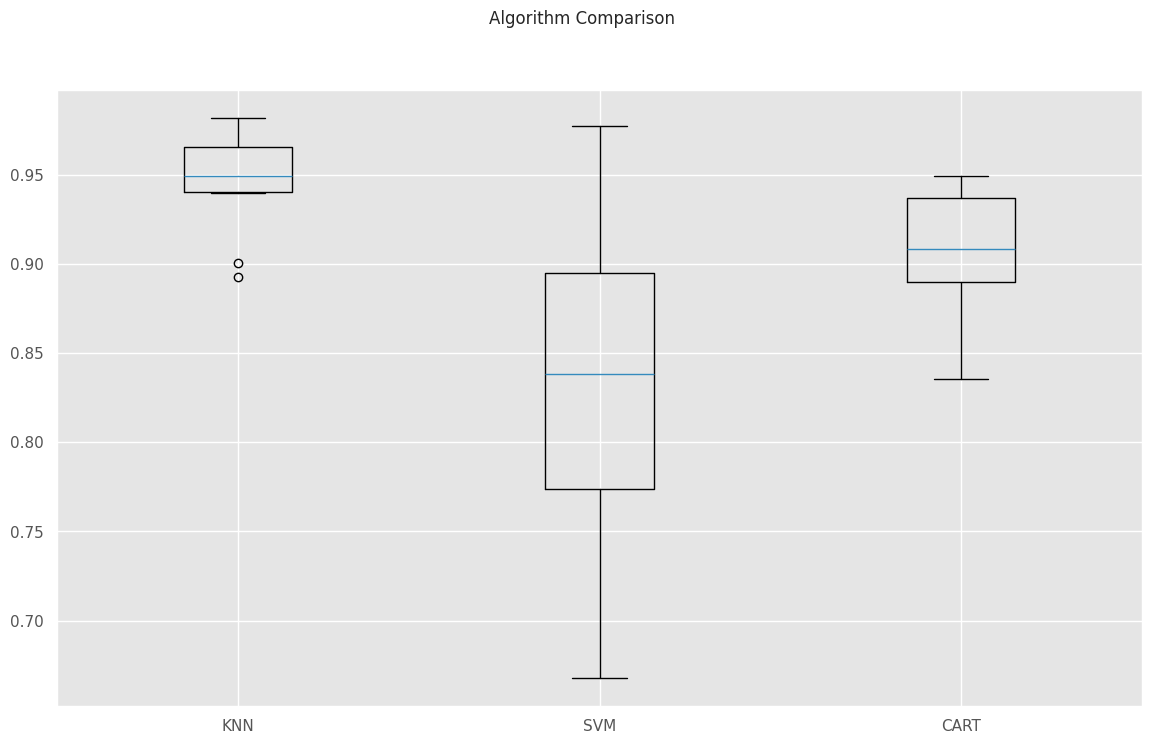

In [44]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#**Summary**

1.All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.

2.The fraud transactions are equitable distributed throughout time and there is no clear relationship of time with commiting of fraud.

3.The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.

#**Conclusion**

1.KNN algorithm performs better than SVM & Decision Tree algorithms (accuracy is high).

2.It has high accuracy rate to find the fradulent activities from the non-fraudulent ones in the given dataset.

3.Thus, credit card fraud detection has been completed successfully using KNN algorithm.